In [2]:
from qiskit import transpile, QuantumCircuit, Aer, assemble
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import array_to_latex, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import PhaseOracle
import numpy as np

In [4]:
PI = np.pi

In [4]:
def display_unitary(qc, prefix=""):
    sim = Aer.get_backend('aer_simulator')
    qc = qc.copy()
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary, prefix=prefix, max_size=9999))


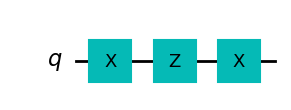

In [16]:
oracle_1_sat = PhaseOracle.from_dimacs_file('1sat-0.dimacs')
oracle_1_sat.draw("mpl")

In [17]:
display_unitary(oracle_1_sat)

<IPython.core.display.Latex object>

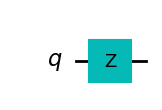

In [14]:
oracle_1_sat_1 = PhaseOracle.from_dimacs_file('1sat-1.dimacs')
oracle_1_sat_1.draw("mpl")

In [15]:
display_unitary(oracle_1_sat_1)

<IPython.core.display.Latex object>

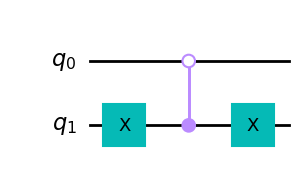

In [33]:
oracle_2_sat = PhaseOracle.from_dimacs_file('2sat-0.dimacs')
oracle_2_sat.draw("mpl")

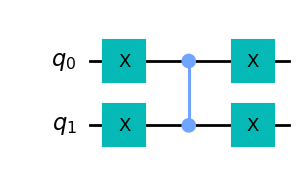

In [34]:
oracle_2_sat_transpiled = transpile(oracle_2_sat, AerSimulator())
oracle_2_sat_transpiled.draw('mpl')

In [35]:
display_unitary(oracle_2_sat_transpiled)

<IPython.core.display.Latex object>

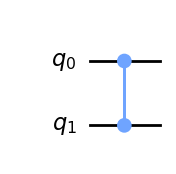

In [40]:
oracle_2_sat_1 = PhaseOracle.from_dimacs_file('2sat-1.dimacs')
oracle_2_sat_1.draw("mpl")

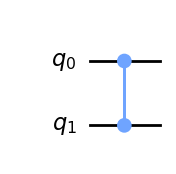

In [41]:
oracle_2_sat_1_transpiled = transpile(oracle_2_sat_1, AerSimulator())
oracle_2_sat_1_transpiled.draw('mpl')

In [42]:
display_unitary(oracle_2_sat_1_transpiled)

<IPython.core.display.Latex object>

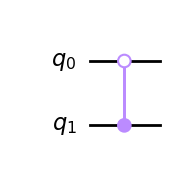

In [61]:
oracle_2_sat_2 = PhaseOracle.from_dimacs_file('2sat-2.dimacs')
oracle_2_sat_2.draw("mpl")

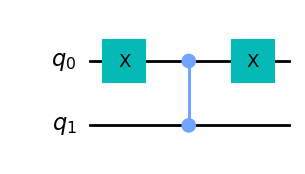

In [62]:
oracle_2_sat_2_transpiled = transpile(oracle_2_sat_2, AerSimulator())
oracle_2_sat_2_transpiled.draw('mpl')

In [63]:
display_unitary(oracle_2_sat_2_transpiled)

<IPython.core.display.Latex object>

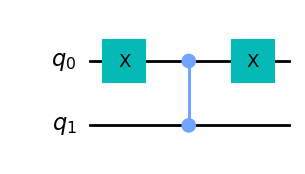

In [34]:
test_z = QuantumCircuit(2)
test_z.x(0)

test_z.cz(0, 1)
test_z.x(0)

test_z.draw('mpl')

In [43]:
for y in np.arange(0, 1, 0.01):
    test_ry = QuantumCircuit(1, 1)
    test_ry.ry(y, 0)
    test_ry.measure([0], [0])
    test_ry.draw('mpl')

    result = AerSimulator().run(test_ry).result().get_counts()
    
    print(y, result)

0.0 {'0': 1024}
0.01 {'0': 1024}
0.02 {'0': 1024}
0.03 {'0': 1024}
0.04 {'1': 1, '0': 1023}
0.05 {'1': 1, '0': 1023}
0.06 {'0': 1024}
0.07 {'1': 2, '0': 1022}
0.08 {'1': 2, '0': 1022}
0.09 {'0': 1024}
0.1 {'1': 4, '0': 1020}
0.11 {'1': 3, '0': 1021}
0.12 {'1': 3, '0': 1021}
0.13 {'1': 8, '0': 1016}
0.14 {'1': 9, '0': 1015}
0.15 {'1': 4, '0': 1020}
0.16 {'1': 8, '0': 1016}
0.17 {'1': 9, '0': 1015}
0.18 {'1': 8, '0': 1016}
0.19 {'1': 8, '0': 1016}
0.2 {'1': 10, '0': 1014}
0.21 {'1': 13, '0': 1011}
0.22 {'1': 11, '0': 1013}
0.23 {'1': 14, '0': 1010}
0.24 {'1': 12, '0': 1012}
0.25 {'1': 20, '0': 1004}
0.26 {'1': 15, '0': 1009}
0.27 {'1': 19, '0': 1005}
0.28 {'1': 23, '0': 1001}
0.29 {'1': 20, '0': 1004}
0.3 {'1': 20, '0': 1004}
0.31 {'1': 19, '0': 1005}
0.32 {'1': 30, '0': 994}
0.33 {'1': 32, '0': 992}
0.34 {'1': 31, '0': 993}
0.35000000000000003 {'1': 25, '0': 999}
0.36 {'1': 40, '0': 984}
0.37 {'1': 31, '0': 993}
0.38 {'1': 33, '0': 991}
0.39 {'1': 44, '0': 980}
0.4 {'1': 52, '0': 972}
0

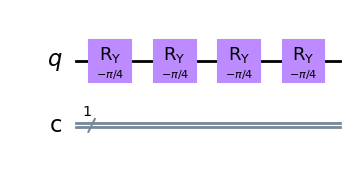

In [52]:
test_ry = QuantumCircuit(1, 1)
test_ry.ry(-PI/4, 0)
test_ry.ry(-PI/4, 0)
test_ry.ry(-PI/4, 0)
test_ry.ry(-PI/4, 0)
#test_ry.measure([0], [0])
test_ry.draw('mpl')

In [55]:
st = Statevector(test_ry)
st.draw("latex")

<IPython.core.display.Latex object>

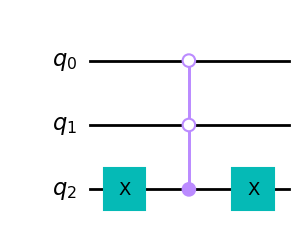

In [58]:
oracle_3_sat = PhaseOracle.from_dimacs_file('3sat-0.dimacs')
oracle_3_sat.draw("mpl")

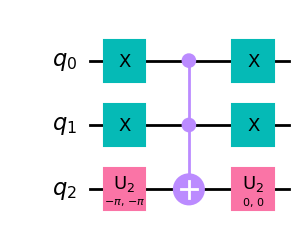

In [59]:
oracle_3_sat_transpiled = transpile(oracle_3_sat, AerSimulator())
oracle_3_sat_transpiled.draw('mpl')

# U2 (-PI, -PI) is equal to XH

In [60]:
display_unitary(oracle_3_sat_transpiled)

<IPython.core.display.Latex object>

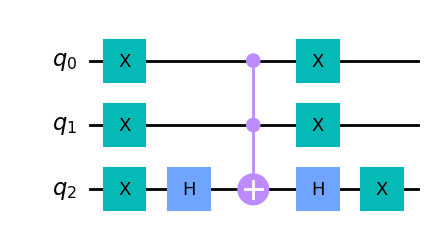

In [178]:
oracle_3_sat_my_version = QuantumCircuit(3)

oracle_3_sat_my_version.x(0)
oracle_3_sat_my_version.x(1)
oracle_3_sat_my_version.x(2)

oracle_3_sat_my_version.h(2)

oracle_3_sat_my_version.ccx(0, 1, 2)

oracle_3_sat_my_version.h(2)
oracle_3_sat_my_version.x(2)
oracle_3_sat_my_version.x(0)
oracle_3_sat_my_version.x(1)

oracle_3_sat_my_version.draw("mpl")

In [179]:
display_unitary(oracle_3_sat_my_version)

<IPython.core.display.Latex object>

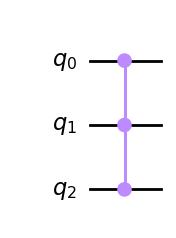

In [180]:
oracle_3_sat_1 = PhaseOracle.from_dimacs_file('3sat-1.dimacs')
oracle_3_sat_1.draw("mpl")

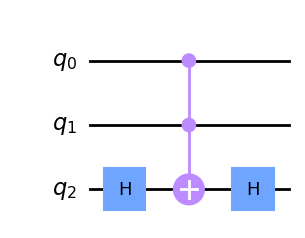

In [62]:
oracle_3_sat_1_transpiled = transpile(oracle_3_sat_1, AerSimulator())
oracle_3_sat_1_transpiled.draw('mpl')

In [63]:
display_unitary(oracle_3_sat_1_transpiled)

<IPython.core.display.Latex object>

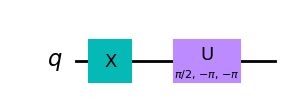

In [5]:
test_u2 = QuantumCircuit(1)
test_u2.x(0)
test_u2.u(PI/2, -PI, -PI, 0)

#test_u2.u(PI/2, 0, 0, 0) #same as a hadamard gate in a 0 state (Z axis)
#test_u2.u(-PI/2, 0, 0, 0) #same as a hadamard gate in a 1 state (Z axis)

#test_u2.u(-PI/2, PI, PI, 0)

#test_u2.u(PI, 3*PI, 2*PI, 0)

test_u2.draw("mpl")

In [6]:
st = Statevector(test_u2)
st.draw("latex")

<IPython.core.display.Latex object>

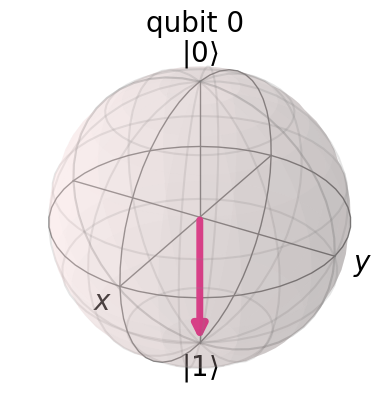

In [162]:
plot_bloch_multivector(st)

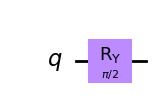

In [148]:
test_y = QuantumCircuit(1)
test_y.ry(PI/2, 0)
test_y.draw("mpl")

In [149]:
st = Statevector(test_y)
st.draw("latex")

<IPython.core.display.Latex object>

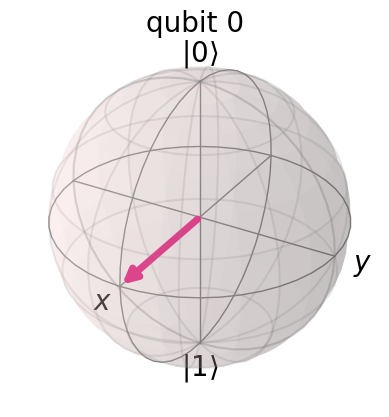

In [150]:
plot_bloch_multivector(st)

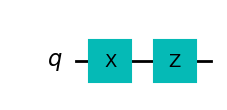

In [166]:
test_z = QuantumCircuit(1)
test_z.x(0)
test_z.z(0)
test_z.draw("mpl")

In [167]:
st = Statevector(test_z)
st.draw("latex")

<IPython.core.display.Latex object>

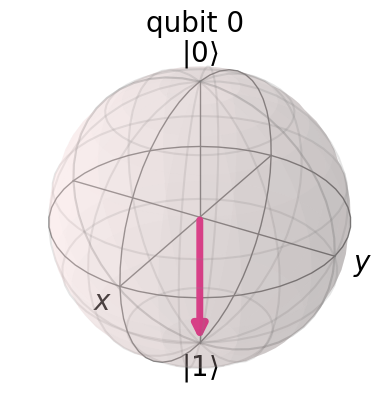

In [168]:
plot_bloch_multivector(st)

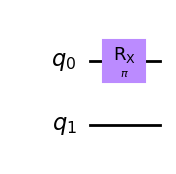

In [173]:
test_rx = QuantumCircuit(2)
test_rx.rx(PI, 0)
test_rx.draw("mpl")

In [174]:
st = Statevector(test_rx)
st.draw("latex")

<IPython.core.display.Latex object>

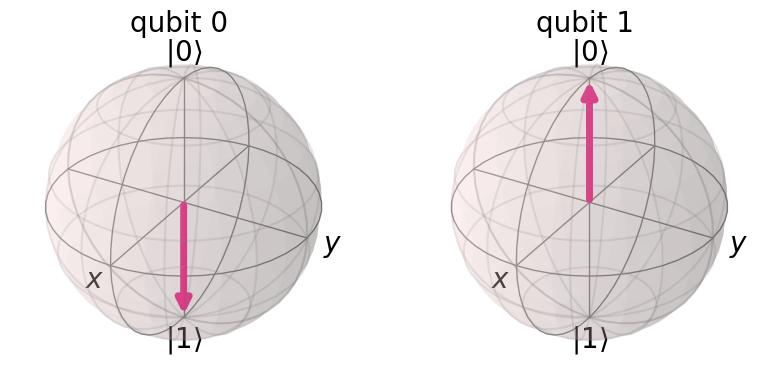

In [175]:
plot_bloch_multivector(st)

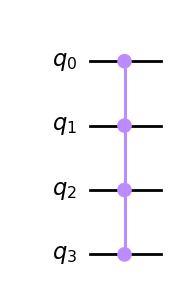

In [185]:
oracle_4_sat = PhaseOracle.from_dimacs_file('4sat-1.dimacs')
oracle_4_sat.draw("mpl")

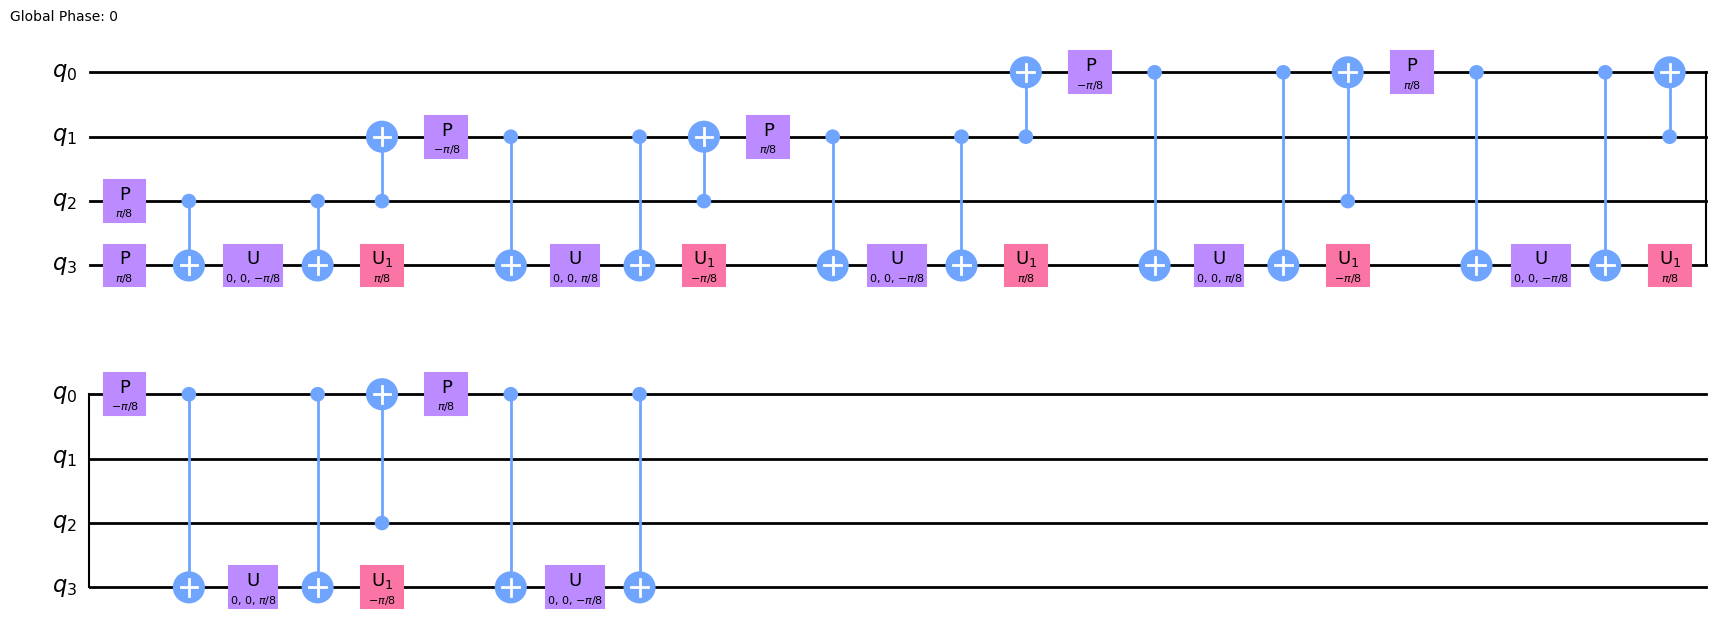

In [186]:
oracle_4_sat_transpile = transpile(oracle_4_sat, AerSimulator())
oracle_4_sat_transpile.draw("mpl")

In [184]:
display_unitary(oracle_4_sat_transpile)

<IPython.core.display.Latex object>

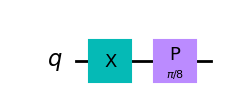

In [191]:
test_p = QuantumCircuit(1)
test_p.x(0)
test_p.p(PI/8, 0)
test_p.draw("mpl")

In [192]:
st = Statevector(test_p)
st.draw("latex")

<IPython.core.display.Latex object>

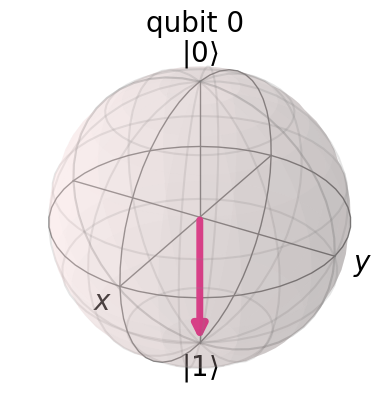

In [193]:
plot_bloch_multivector(st)